<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assginment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

***Objective Function***

In [0]:
def j_objective(m,theta0,theta1,x_point,y_point):
  sum=0
  for i in range(0,m):
    sum=sum+np.square(theta1*x_point[i]+theta0-y_point[i])
  return sum/(2*m)

***Functions for Gradient Descent***

In [0]:
def next_0(theta0,theta1,a,m,x_point,y_point):
  new_0=0
  sum=0
  for i in range(0,m):
    sum=sum+theta1*x_point[i]+theta0-y_point[i]
  new_0=theta0-((a*sum)/m)
  return new_0

In [0]:
def next_1(theta0,theta1,a,m,x_point,y_point):
  new_1=0
  sum=0
  for i in range(0,m):
    sum=sum+(theta1*x_point[i]+theta0-y_point[i])*x_point[i]
  new_1=theta1-((a*sum)/m)
  return new_1

***Size of Gradient***

In [0]:
def gradient(m,theta0,theta1, x_point,y_point):
  sum0=0
  sum1=0
  for i in range(0,m):
    sum0=sum0+theta1*x_point[i]+theta0-y_point[i]
  for i in range(0,m):
    sum1=sum1+(theta1*x_point[i]+theta0-y_point[i])*x_point[i]
  return np.sqrt((np.square(sum0)+np.square(sum1))/m)

In [0]:
path="data.csv"

In [0]:
data=np.genfromtxt(path,delimiter=',')

In [0]:
x_data=data[:,0]

In [0]:
y_data=data[:,1]

In [78]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

***Plot of set of points that are loaded from 'data.csv' file***

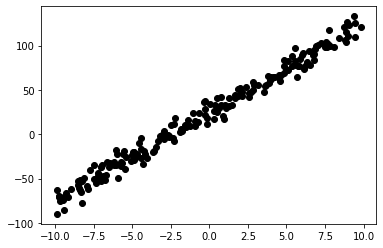

In [79]:
plt.scatter(x_data,y_data,c='#000000')

In [0]:
plt.show()

***Linear Regression***

In [0]:
i=0

In [0]:
a=0.01

In [0]:
theta_0=[-30]

In [0]:
theta0=theta_0[-1]

In [0]:
theta_1=[-30]

In [0]:
theta1=theta_1[-1]

In [0]:
objective=[]

In [0]:
m=len(x_data)

In [0]:
while gradient(m,theta0,theta1,x_data,y_data)>0.01:
  objective.append(j_objective(m,theta0,theta1,x_data,y_data))
  theta_0.append(next_0(theta0,theta1,a,m,x_data,y_data))
  theta_1.append(next_1(theta0,theta1,a,m,x_data,y_data))
  theta0=next_0(theta_0[i],theta_1[i],a,m,x_data,y_data)
  theta1=next_1(theta_0[i],theta_1[i],a,m,x_data,y_data)
  i=i+1

***Linear Regression Result***
1. plot set of points in 'data.csv'
2. estimated straight line

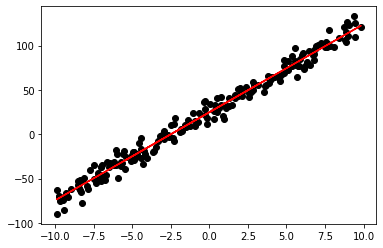

In [90]:
plt.plot(x_data,x_data*theta1+theta0,color="#FF0000")
plt.scatter(x_data,y_data,c='#000000')

***Plot the Energy Surface of function J with range of var***

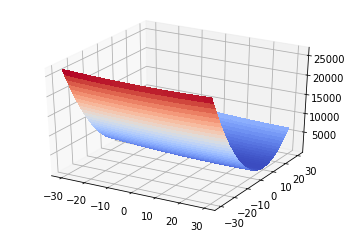

In [91]:
fig=plt.figure()
ax=fig.gca(projection='3d')
#make data
theta=np.arange(-30,30,0.1)
x=np.arange(-30,30,0.1)
y=np.arange(-30,30,0.1)
x,y=np.meshgrid(x,y)
z=j_objective(m,x,y,x_data,y_data)

#plot the surface
surf=ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                     linewidth=0,antialiased=False)

plt.show()